### 迴歸分析（Regression Analysis）

一種統計學上分析數據的方法，目的在於了解兩個或多個變數間是否相關、方向與強度，並建立數學模型以便觀察特定變數來預測研究者感興趣的變數。



<img src="pics/question mark cat.jpeg" alt="question mark cat" style="width: 300px">

大白話：
想像一個情況，你想知道花多少時間準備考試，會不會影響考試成績。你可以收集不同學生的考試成績和他們準備考試的時間。這裡，考試成績是你關心的「結果」，而準備考試的時間是「原因」。迴歸分析可以幫助你找出考試成績和準備時間之間的關係。

### 「相關性」和「因果性」

先來解釋什麼是相關性

<img src="pics/related.png" alt="related" style="width: 300px">

如上圖，從統計數據看出，「氣溫」越高，「手搖杯銷量」就越好，那我們就能稱這兩者為正相關

如果兩者有相關性，那我們就能取其中一者去預測另外一者，例如從「氣溫」去預測「手搖杯銷量」或從「手搖杯銷量」去預測「氣溫」

但是導致了兩者有相關性的情況可能有下面幾種狀況

<img src="pics/relation case.png" alt="relation case" style="width: 500px">

真正的因果性只有左上角的A導致B，其餘的情況皆為誤把相關性當成因果性，也就是所謂的「因果謬誤」，下面會一一舉例。

**B導致A** : 年輕人比較容易衝動尋短見，老年人比較沈穩，這背後的原因也許是個性較衝動或容易尋短見的人比較不易活到老年。這就是把因視為果的錯誤解讀。

**C同時導致A和B** : 
冰淇淋銷售量和溺水人數呈正相關，這其中是因為季節(或氣溫)的因素，因為季節導致想買冰淇淋或想玩水的人數上升，因此是季節導致了這兩樣變數有相關性。

**奇怪的巧合** :有一個名叫[spurious-correlations](https://www.tylervigen.com/spurious-correlations)的網站，紀錄了很多奇怪的正相關性高的變數，像是：每人消耗的莫扎雷拉起司量與獲得土木工程博士學位的人數之間存在高度正相關。


### 回歸模型的目標?

回歸模型用於找出變數之間的「相關性」，而不是「因果性」。回歸模型可以告訴我們在給定特徵的情況下，因變數可能的變化趨勢。

要確定因果關係，通常需要更多的研究和複雜的方法，而不僅僅是使用回歸模型。因果關係需要控制其他可能的變數，使用隨機實驗或者嚴格的實驗設計，以確保所觀察到的變化確實是因果關係，而不是純粹的相關性。

### 回歸模型的模樣與種類

線性迴歸：

利用稱為線性回歸方程式的最小平方函數對一個或多個自變數和應變數之間關係進行建模的一種回歸分析
<img src="pics/question mark cat.jpeg" alt="question mark cat" style="width: 300px">

先解釋自變數和應變數

**自變數(independent variable)** : 從英文角度來看，有個獨立(independent)在裡面，可以把他想成在資料中他是獨立自己改變的，不受別人影響，只有他去影響別人，也就是「因」，例如：在預測飲料的銷量中，今天的氣溫，後天的氣溫跟大後天的氣溫就是屬於自變數。

**因變數(dependent variable)** : 從英文角度來看，有個非獨立(dependent)在裡面，那他就是會受其他資料所影響的變數，也就是「果」，例如：在預測飲料的銷量中，飲料的銷量就是屬於自變數。

線性回歸就是假設兩者的關係為線性的，並且找出一條線最能表現出自變數跟因變數之間的**相關性**

圖中「氣溫」為自變數，「手搖杯銷量」為因變數

<img src="pics/regression example.png" alt="regression example" style="width: 300px">

高中數學教過 y = wx + b

這就是**簡單線性回歸(Simple linear regression)**, x是自變數, y為因變數, w為斜率, b為截距

簡單線性回歸中只能有一個自變數x

至於超過一個自變數便稱為**多元線性回歸(multiple regression)**，公式如下：

<img src="pics/multiple regression.png" alt="multiple regression" style="width: 300px">



### 最小平方
那我們要怎麼找出這條線？

<img src="pics/RSS.png" alt="RSS" style="width: 600px">

先不論overfitting的問題(之後會講到)，在原則上只要能回歸線可以通過每一個資料點，那這條線就越能代表兩個變數間的關係，也就是說RSS最小的線就是我們要的回歸線，取平方是為了不讓資料與迴歸線的差距出現正負相消。
以下簡稱殘差為ε：


<img src="pics/regression epsilon.png" alt="ols" style="width: 260px">

### 迴歸線評估
除了用最基本的mean square error做評估以外，線性回歸還有一個名為R平方的評估指標

<img src="pics/TSS.png" alt="TSS" style="width: 600px">

不考慮資料點，畫出一條水平作為bassline，這條線就叫TSS。

如果今天擬合出來的RSS越靠近TSS，則R平方越靠近0，反之RSS越靠近0，則R平方越靠近1。

這種計算實際值與預測值差距的式子我們稱為loss function

<img src="pics/regression loss.png" alt="regression loss" style="width: 860px">

## 實作

### 從零開始建立線性回歸模型

In [53]:
import copy
import numpy as np

class LinearRegression:
    # 初始化所有的訓練參數
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        n_samples, n_features = X.shape
        # 初始化w,這邊一開始設定全0，也可用其他的隨機數字取代
        self.weights = np.zeros(n_features)
        # 初始化bias
        self.bias = 0

        # 蒐集weight的變化
        self.weights_changes = [self.weights]
        # 蒐集bias的變化
        self.bias_changes = [self.bias]
        # gradient descent
        for _ in range(self.n_iters):
            # 先按照目前的回歸線給出預測值
            y_predicted = np.dot(X, self.weights) + self.bias
            # 按照上面的公式算出w update的gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            # 按照上面的公式算出b update的gradient
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 更新目前的w
            self.weights -= self.lr * dw
            self.weights_changes.append(copy.deepcopy(self.weights))

            # 更新目前的b
            self.bias -= self.lr * db
            self.bias_changes.append(copy.deepcopy(self.bias))

    def predict(self, X):

        y_approximated = np.dot(X, self.weights) + self.bias
        
        return y_approximated

生成個簡單線性回歸的資料集

In [183]:
from sklearn import datasets
# n_sample : 生成資料筆數
# n_features : 自變數數量
# n_targets : 因變數數量
# noise: 添加的高斯雜訊的標準差
X, y = datasets.make_regression(n_samples=500, n_features=1, n_targets=1, noise=22)

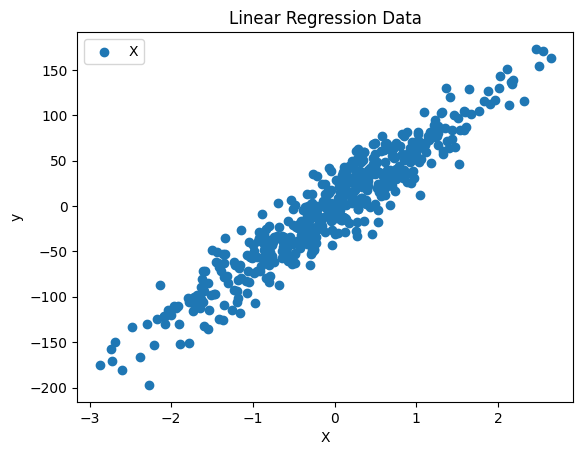

In [184]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label='X')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Data')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

#  用線性回歸訓練剛剛創建的資料集
regressor = LinearRegression(learning_rate=0.02, n_iters=120)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

In [9]:
# 將訓練過程中的每一條回歸線畫出儲存
from tqdm import tqdm

pic_index = 1

for w, b in tqdm(zip(regressor.weights_changes, regressor.bias_changes)):

    reg = np.dot(X, w) + b
    plt.scatter(X, y)
    plt.plot(X, reg, label='Regression line', color="red")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Linear Regression Data')
    plt.legend(loc="upper right")
    plt.savefig(f'pics/regression process/{pic_index}.png')
    # 清除當前圖形
    plt.clf()  
    pic_index += 1


0it [00:00, ?it/s]

121it [01:01,  1.98it/s]


<Figure size 640x480 with 0 Axes>

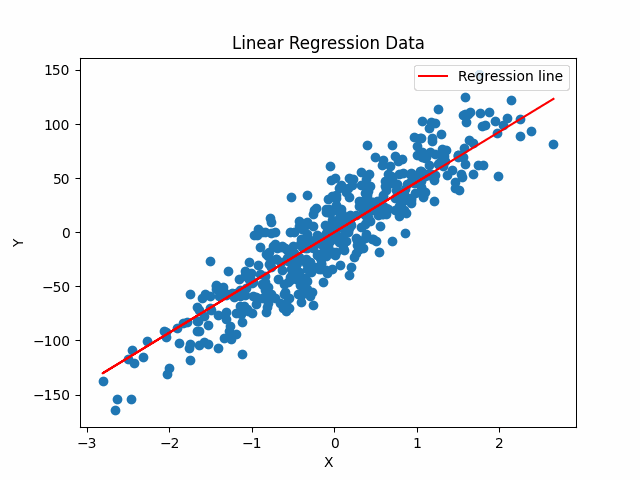

In [10]:
import imageio
from IPython.display import Image
import warnings
# 忽略 DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 取出剛剛儲存的圖片製成gif
with imageio.get_writer('regression process.gif', mode='I') as writer:
    for filename in [f'pics/regression process/{i}.png' for i in range(1, 120)]:
        image = imageio.imread(filename)
        writer.append_data(image)
# 顯示gif
Image("regression process.gif")

### 多元線性回歸

這邊使用wine quality資料集

In [2]:
import pandas as pd

df = pd.read_csv('Life Expectancy Data.csv').dropna()

In [69]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
# 取十個column出來做示範
df = df[['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'Life expectancy ']]
df.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,59.2


In [71]:
from sklearn.model_selection import train_test_split
target = 'Life expectancy '
X, y = df.drop(target, axis=1), df[target]

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234)

In [93]:
import category_encoders as ce
"""
！注意 test要用train的fit去做轉換！
如果在fit_transform時使用了train dataset的範圍
那麼scalor可能已經“了解”了test dataset的範圍
可能會導致信息洩漏，使得模型對test dataset的表現過於樂觀
"""

encoder = ce.LeaveOneOutEncoder(cols=["Status", "Country"], sigma = 0.1)

encoding_train = encoder.fit_transform(X_train, y_train)

encoding_test = encoder.transform(X_test)

In [94]:
from sklearn.preprocessing import StandardScaler

scalor = StandardScaler()

encoding_train =  scalor.fit_transform(encoding_train)
encoding_test = scalor.transform(encoding_test)

In [95]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(encoding_train, y_train)
predictions = regressor.predict(encoding_test)

In [96]:
regressor.weights

array([ 3.55801709,  0.48304299,  0.03069217, -3.39941569, -0.2551683 ,
        0.78969851,  0.98497568,  0.48402683,  1.38464424])

In [97]:
regressor.bias

69.41898931954934

特徵權重(wi)表示了在其他特徵保持不變的情況下，每個特徵單位變化對目標變數的影響。

某個wi為正數，則表示當該xi的值增加時，y的值有可能增加，而當該xi的值減少時，y的值可能會減少。

相反，如果某個wi為負數，則表示當該xi增加時，y的值可能會減少，而當該xi值減少時，y的值可能會增加。

若wi接近零則可能是：

1. **弱相關性:**

表示該特徵與目標變數之間的關係較弱。這意味著在預測目標變數時，該特徵的變化對目標變數的影響相對較小，可能不足以提供明顯的預測能力。

2. **多重共線性：** 

在多個特徵之間高度相關的情況下，模型可能難以區分各個特徵對目標變數的獨立影響，導致權重分布接近零。

In [98]:
# 先評估當前的模型
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R2:", r2)
print("mean square error:", mse)

R2: 0.8030190534058717
mean square error: 14.941960382858628


In [99]:
for col, w in zip(df.columns, regressor.weights):
    print(f"{col} wieght : {w}")

Country wieght : 3.5580170898319845
Year wieght : 0.4830429869635831
Status wieght : 0.030692169017409888
Adult Mortality wieght : -3.399415687408495
infant deaths wieght : -0.25516829851968426
Alcohol wieght : 0.7896985130918333
percentage expenditure wieght : 0.9849756822663229
Hepatitis B wieght : 0.484026825327467
Measles  wieght : 1.384644243848488


In [100]:
# sklearn implement
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

# fit model
LR_model.fit(encoding_train, y_train)

print("Score the X-test  with Y-test  is : ", LR_model.score(encoding_test, y_test))

Score the X-test  with Y-test  is :  0.803225216179607


線性回歸使用**最小平方法**去擬合回歸線，其實是根據了下面幾項假設

* 假定樣本誤差服從常態分佈

* 假定樣本誤差的出現是隨機的

* 假定樣本誤差是獨立的

反過來說，如果我們的數據不是互相獨立的，或者不是隨機出現的，就不適合做線性回歸。

關於該假設的證明會在最大似然估計中有詳細的說明，此處先記得使用的場景即可。